<a href="https://colab.research.google.com/github/rewpak/AI-works/blob/main/Image_Processing_Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 7. Image Processing
# Task 7.3 Object Recognition
# Problem Descriptions

Input: The photo is input into the YOLO model. This model is a pre-trained convolutional neural network (CNN).

Divide into Grid: The image is divided into an S×S grid. Each cell of the grid is responsible for detecting objects whose center falls into that cell.

Feature Extraction: The CNN processes the entire image and extracts features. This is done in a single pass, hence the name "You Only Look Once."

Bounding Box Prediction: Each grid cell predicts multiple bounding boxes along with their confidence scores, indicating how confident the model is that the box contains an object.

Class Prediction: Simultaneously, each grid cell predicts the probability of different object classes for each bounding box.

Combine Predictions: The class probabilities are combined with the confidence scores to determine the class-specific confidence for each bounding box.

Non-maximum Suppression: To reduce redundancy, non-maximum suppression is applied. It removes overlapping bounding boxes, keeping only the ones with the highest confidence scores.

Output: The final output consists of bounding boxes around detected objects along with their predicted classes and confidence level

In [ ]:
!pip install cvlib
import cvlib
from cvlib.object_detection import draw_bbox, YOLO

In [ ]:
# Download the YOLOv3 model configuration, weights and labels files
import shutil
!wget https://github.com/yongminli/data/raw/main/yolov3-tiny.cfg -O '/content/drive/My Drive/YOLO/yolov3-tiny.cfg'
!wget https://github.com/yongminli/data/raw/main/yolov3-tiny.weights -O '/content/drive/My Drive/YOLO/yolov3-tiny.weights'
!wget https://github.com/yongminli/data/raw/main/yolov3.txt -O '/content/drive/My Drive/YOLO/yolov3.txt'

#!wget http://www.brunel.ac.uk/~csstyyl/tmp/yolov3.cfg -O '/content/drive/My Drive/YOLO/yolov3.cfg'
#!wget http://www.brunel.ac.uk/~csstyyl/tmp/yolov3.weights -O '/content/drive/My Drive/YOLO/yolov3.weights'
#!wget http://www.brunel.ac.uk/~csstyyl/tmp/yolov3.txt -O '/content/drive/My Drive/YOLO/yolov3.txt'
# path = ""

#!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg -O '/content/drive/My Drive/YOLO/yolov3.cfg'
#!wget https://pjreddie.com/media/files/yolov3.weights -O '/content/drive/My Drive/YOLO/yolov3.weights'
#!wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names -O '/content/drive/My Drive/YOLO/yolov3.txt'

# Alternatively you can save the data to your Google Drive, and load the data from there
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/My Drive/YOLO/"



--2023-12-26 04:35:26--  https://github.com/yongminli/data/raw/main/yolov3-tiny.cfg
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yongminli/data/main/yolov3-tiny.cfg [following]
--2023-12-26 04:35:26--  https://raw.githubusercontent.com/yongminli/data/main/yolov3-tiny.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1915 (1.9K) [text/plain]
Saving to: ‘/content/drive/My Drive/YOLO/yolov3-tiny.cfg’

/content/drive/My D 100%[===================>]   1.87K  --.-KB/s    in 0s      

2023-12-26 04:35:26 (8.85 MB/s) - ‘/content/drive/My Drive/YOLO/yolov3-tiny.cfg’ saved [1915/1915]

--2023-12-26 0

In [ ]:
# The default YOLO model files
#config = path + 'yolov3.cfg'
#weights = path + 'yolov3.weights'
#labels = path + 'yolov3.txt'

# # Alternative the "tiny" version of YOLO, which is faster but less accurate
config = path + 'yolov3-tiny.cfg'
weights = path + 'yolov3-tiny.weights'
labels = path + 'yolov3.txt'


yolo = YOLO(weights, config, labels)


[INFO] Initializing YOLO ..


In [ ]:
# # Load the image files to Google Colab
from google.colab import files
file = files.upload()

Saving YOLO_resized_copy.png to YOLO_resized_copy.png


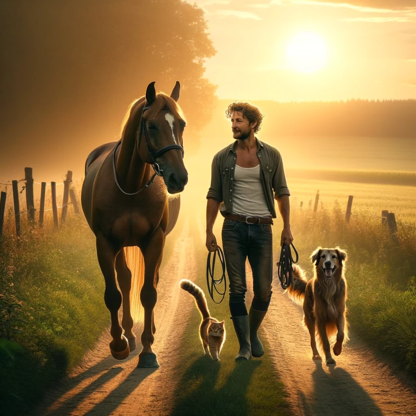

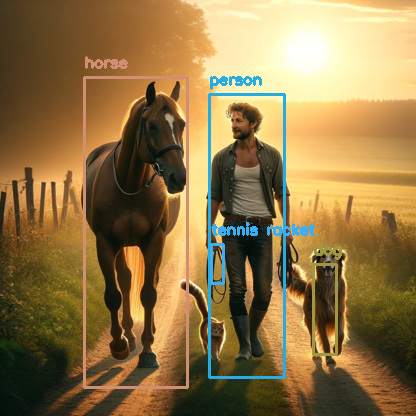

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Read an image file
img = cv2.imread(path+'YOLO_resized_copy.png')
#img = cv2.imread(path+'YOLO.png')
cv2_imshow(img)
print()

# Detect objects from the image, and display the results
#bbox, label, conf = yolo.detect_objects(img)
bbox, label, conf = yolo.detect_objects(img, confidence=0.25, nms_thresh=0.2)
yolo.draw_bbox(img, bbox, label, conf)
cv2_imshow(img)

# Discussion

In this task, we evaluated an object detection algorithm on inputed image using a pre-built model YOLO.

**Default version of YOLO:** The algorithm successfully identified the horse, the dog and the man, placing correct labels on them. However, it did not detect the cat, possibly due to its small size

**Tiny version of YOLO**: The algorithm performed the same as the default version but in addition, it identified a rope as a tennis racket.

